# Data Processing

In [157]:
import pandas as pd
import numpy as np

In [158]:
file = '../data/processed_data.csv'

data = pd.read_csv(file, low_memory=True, skipinitialspace=True)
data.tail(10)

C:\Users\kevwil\AppData\Local\Temp\ipykernel_4156\2487341413.py:3: DtypeWarning: Columns (20,22,23,27,28,29,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file, low_memory=True, skipinitialspace=True)


,index,Access Gained,Attack Origin,Authentication Required,Availability,CVE ID,CVE Page,CWE ID,Complexity,Confidentiality,...,parentID,patch,project,project_after,project_before,target,vul_func_with_fix,processed_func,flaw_line,flaw_line_index
188626,188626,None,Remote,Not required,Complete,CVE-2016-0838,https://www.cvedetails.com/cve/CVE-2016-0838/,CWE-119,Low,Complete,...,NaN,"@@ -33,6 +33,7 @@\n\n *----------------------...",Android,https://android.googlesource.com/platform/exte...,https://android.googlesource.com/platform/exte...,1,"void WT_NoiseGenerator (S_WT_VOICE *pWTVoice,...","void WT_NoiseGenerator (S_WT_VOICE *pWTVoice,...",NaN,NaN
188627,188627,None,Remote,Not required,Complete,CVE-2016-0838,https://www.cvedetails.com/cve/CVE-2016-0838/,CWE-119,Low,Complete,...,NaN,"@@ -33,6 +33,7 @@\n\n *----------------------...",Android,https://android.googlesource.com/platform/exte...,https://android.googlesource.com/platform/exte...,1,void WT_VoiceFilter (S_FILTER_CONTROL *pFilter...,void WT_VoiceFilter (S_FILTER_CONTROL *pFilter...,NaN,NaN
188628,188628,None,Remote,Not required,Complete,CVE-2016-0838,https://www.cvedetails.com/cve/CVE-2016-0838/,CWE-119,Low,Complete,...,NaN,"@@ -33,6 +33,7 @@\n\n *----------------------...",Android,https://android.googlesource.com/platform/exte...,https://android.googlesource.com/platform/exte...,1,"void WT_VoiceGain (S_WT_VOICE *pWTVoice, S_WT_...","void WT_VoiceGain (S_WT_VOICE *pWTVoice, S_WT_...",NaN,NaN
188629,188629,None,Remote,Not required,Complete,CVE-2016-0838,https://www.cvedetails.com/cve/CVE-2016-0838/,CWE-119,Low,Complete,...,NaN,"@@ -29,6 +29,7 @@\n\n \n // includes\n #includ...",Android,https://android.googlesource.com/platform/exte...,https://android.googlesource.com/platform/exte...,1,EAS_BOOL WT_CheckSampleEnd (S_WT_VOICE *pWTVoi...,EAS_BOOL WT_CheckSampleEnd (S_WT_VOICE *pWTVoi...,NaN,NaN
188630,188630,None,Remote,Not required,Complete,CVE-2016-0835,https://www.cvedetails.com/cve/CVE-2016-0835/,CWE-119,Low,Complete,...,NaN,"@@ -60,7 +60,7 @@\n\n *\n * Values Returned :...",Android,https://android.googlesource.com/platform/exte...,https://android.googlesource.com/platform/exte...,1,IMPEG2D_ERROR_CODES_T impeg2d_dec_p_b_slice(de...,IMPEG2D_ERROR_CODES_T impeg2d_dec_p_b_slice(de...,impeg2d_dec_pnb_mb_params(ps_dec);/~/ ...,"44,46"
188631,188631,None,Remote,Not required,Complete,CVE-2016-0835,https://www.cvedetails.com/cve/CVE-2016-0835/,CWE-119,Low,Complete,...,NaN,"@@ -60,7 +60,7 @@\n\n *\n * Values Returned :...",Android,https://android.googlesource.com/platform/exte...,https://android.googlesource.com/platform/exte...,1,void impeg2d_dec_p_mb_params(dec_state_t *ps_d...,void impeg2d_dec_p_mb_params(dec_state_t *ps_d...,NaN,NaN
188632,188632,None,Remote,Not required,Complete,CVE-2016-0835,https://www.cvedetails.com/cve/CVE-2016-0835/,CWE-119,Low,Complete,...,NaN,"@@ -60,7 +60,7 @@\n\n *\n * Values Returned :...",Android,https://android.googlesource.com/platform/exte...,https://android.googlesource.com/platform/exte...,1,void impeg2d_dec_pnb_mb_params(dec_state_t *ps...,void impeg2d_dec_pnb_mb_params(dec_state_t *ps...,NaN,NaN
188633,188633,None,Remote,Not required,None,CVE-2017-0402,https://www.cvedetails.com/cve/CVE-2017-0402/,CWE-200,Medium,Partial,...,NaN,"@@ -265,8 +265,12 @@\n\n case EQ_PARAM_BAN...",Android,https://android.googlesource.com/platform/hard...,https://android.googlesource.com/platform/hard...,1,int equalizer_get_parameter(effect_context_t *...,int equalizer_get_parameter(effect_context_t *...,if (param2 >= NUM_EQ_BANDS) {/~/ if (pa...,"78,89,90,100"
188634,188634,None,Remote,Not required,None,CVE-2018-9503,https://www.cvedetails.com/cve/CVE-2018-9503/,CWE-125,Low,Complete,...,NaN,"@@ -517,7 +517,16 @@\n\n return (RFC_EVENT...",Android,https://android.googlesource.com/platform/syst...,https://android.googlesource.com/platform/syst...,1,"uint8_t rfc_parse_data(tRFC_MCB* p_mcb, MX_FRA...","uint8_t rfc_parse_data(tRFC_MCB* p_mcb, MX_FRA...","RFCOMM_PARSE_LEN_F

## Find vulnerable entries

In [159]:
data_vuls = data[data['target'] == True]
cnt_vuls = data_vuls.shape[0]
cnt_vuls

10900

In [160]:
cnt_data = data.shape[0]
cnt_data

188636

## Calculate percentage of vulnerabilities

In [161]:
cnt_vuls / cnt_data * 100

5.778324391950635

## Extract valid entries

In [162]:
data_valid = data[data['target'] == False]
cnt_valid = data_valid.shape[0]
cnt_valid

177736

## Create a dataset

In [163]:
fraction = 0.10
data_fraction = data.groupby("target").sample(frac=fraction)
data_fraction

,index,Access Gained,Attack Origin,Authentication Required,Availability,CVE ID,CVE Page,CWE ID,Complexity,Confidentiality,...,parentID,patch,project,project_after,project_before,target,vul_func_with_fix,processed_func,flaw_line,flaw_line_index
33989,33989,None,Local Network,Single system,Complete,CVE-2013-0217,https://www.cvedetails.com/cve/CVE-2013-0217/,CWE-399,Medium,None,...,NaN,"@@ -147,7 +147,8 @@ void xen_netbk_remove_xenv...",linux,7d5145d8eb2b9791533ffe4dc003b129b9696c48,48856286b64e4b66ec62b94e504d0b29c1ade664,0,static int netbk_set_skb_gso(struct xenvif *vi...,static int netbk_set_skb_gso(struct xenvif *vi...,NaN,NaN
24608,24608,None,Local,Not required,Complete,CVE-2011-3353,https://www.cvedetails.com/cve/CVE-2011-3353/,CWE-119,Low,None,...,NaN,"@@ -1358,6 +1358,10 @@ static int fuse_notify_...",linux,c2183d1e9b3f313dd8ba2b1b0197c8d9fb86a7ae,478e0841b3dce3edc2c67bf0fc51af30f582e9e2,0,static ssize_t fuse_dev_splice_read(struct fil...,static ssize_t fuse_dev_splice_read(struct fil...,NaN,NaN
109651,109651,None,Remote,Not required,Partial,CVE-2012-5136,https://www.cvedetails.com/cve/CVE-2012-5136/,CWE-20,Medium,Partial,...,NaN,"@@ -434,6 +434,7 @@ Document::Document(const D...",Chrome,401d30ef93030afbf7e81e53a11b68fc36194502,2d2e2574c4fe21c6cefe05de73cf23ffa2aff79b,0,void Document::dispatchWindowLoadEvent()\n{\n ...,void Document::dispatchWindowLoadEvent()\n{\n ...,NaN,NaN
97652,97652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"@@ -8106,17 +8106,17 @@ xmlXPathNextPrecedingS...",Chrome,a44b00c88bc5ea35b5b150217c5fd6e4ce168e58,eef2c2ed6ea089b49c0f6468154d5a4d524abaeb,0,xmlXPathDebugObjUsageReleased(xmlXPathContextP...,xmlXPathDebugObjUsageReleased(xmlXPathContextP...,NaN,NaN
52692,52692,None,Local,Not required,None,CVE-2016-4578,https://www.cvedetails.com/cve/CVE-2016-4578/,CWE-200,Low,Partial,...,NaN,"@@ -1266,6 +1266,7 @@ static void snd_timer_us...",linux,e4ec8cc8039a7063e24204299b462bd1383184a5,9a47e9cff994f37f7f0dbd9ae23740d0f64f9fe6,0,static void snd_timer_free_all(void)\n{\n\tstr...,static void snd_timer_free_all(void)\n{\n\tstr...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185171,185171,None,Remote,Not required,Partial,CVE-2013-0910,https://www.cvedetails.com/cve/CVE-2013-0910/,CWE-287,Low,Partial,...,NaN,"@@ -133,7 +133,7 @@ void PluginInfoMessageFilt...",Chrome,ac8bd041b81e46e4e4fcd5021aaa5499703952e6,a0461055bead3cb4904fec723e4145b629db4360,1,void PluginInfoMessageFilter::PluginsLoaded(\n...,void PluginInfoMessageFilter::PluginsLoaded(\n...,"context_.GrantAccess(output.status, output.p...",21
177890,177890,None,Remote,Not required,Partial,CVE-2015-3195,https://www.cvedetails.com/cve/CVE-2015-3195/,CWE-200,Low,None,...,fb4f46763fed3c600db21974577061b611b6fa46,"@@ -180,6 +180,8 @@ int ASN1_item_ex_d2i(ASN1_...",openssl,https://git.openssl.org/?p=openssl.git;a=blob;...,https://git.openssl.org/?p=openssl.git;a=blob;...,1,"int ASN1_item_ex_d2i(ASN1_VALUE **pval, const ...","int ASN1_item_ex_d2i(ASN1_VALUE **pval, const ...","ASN1_item_ex_free(pval, it);",338
183109,183109,None,Remote,Not required,Partial,CVE-2016-9535,https://www.cvedetails.com/cve/CVE-2016-9535/,CWE-119,Low,Partial,...,NaN,"@@ -409,7 +409,7 @@ fpAcc(TIFF* tif, uint8* cp...",libtiff,6a984bf7905c6621281588431f384e79d11a2e33,3ca657a8793dd011bf869695d72ad31c779c3cc1,1,"PredictorEncodeTile(TIFF* tif, uint8* bp0, tms...","PredictorEncodeTile(TIFF* tif, uint8* bp0, tms...",NaN,NaN
182685,182685,None,Remote,Not required,Partial,CVE-2019-16058,https://www.cvedetails.com/cve/CVE-2019-16058/,CWE-119,Low,None,...,NaN,"@@ -31,6 +31,7 @@\n #include <openssl/crypto.h...",pam_p11,d150b60e1e14c261b113f55681419ad1dfa8a76c,26e329f1a5ec3c2651211a101191ec2d7d5176d3,1,"static int key_verify(pam_handle_t *pamh, int ...","static int key_verify(pam_handle_t *pamh, int ...",\tunsigned char signature[256];/~/\tunsigned i...,"4,5"


In [164]:
data_fraction.groupby("target").size()

target
0    17774
1     1090
dtype: int64

In [165]:
data_target_grouped = data.groupby("target")
 
data_balanced = data_target_grouped.apply(lambda x: x.sample(data_target_grouped.size().min()).reset_index(drop=True))
 
data_balanced = data_balanced.droplevel("target")
data_balanced.groupby("target").size()

target
0    10900
1    10900
dtype: int64

In [166]:
#data_balanced.to_csv('../data/balanced_data.csv')
sample_size = 100
data_balanced_mini = data_balanced.groupby('target').sample(n=sample_size)
data_balanced_mini.groupby("target").size()

target
0    100
1    100
dtype: int64

In [167]:
data_balanced_mini.to_csv('../data/balanced_data_mini.csv')

# Features

In [168]:
data = pd.read_csv('../data/balanced_data.csv')

In [169]:
feature_columns = ['processed_func']
target_columns = ['target']

target = data[target_columns]
features = data[feature_columns]
features

,processed_func
0,void CairoOutputDev::drawImageMaskRegular(GfxS...
1,coolkey_add_object(coolkey_private_data_t *pri...
2,void CSoundFile::FineVolumeUp(ModChannel *pChn...
3,OscillatorNode* AudioContext::createOscillator...
4,void FrameView::setMediaType(const AtomicStrin...
...,...
21795,void PageHandler::SetRenderer(RenderProcessHos...
21796,static void Process_ipfix_template_add(exporte...
21797,status_t NuPlayer::GenericSource::initFromData...
21798,void MigrationTest::SetUpVersion76Database() {...


### Codebert tokenizing

In [171]:
from transformers import AutoTokenizer, AutoModel
import torch

tokenizer = AutoTokenizer.from_pretrained("microsoft/codebert-base")

features['function_tokenized'] = features['processed_func'].apply(tokenizer.tokenize)
features['function_tokenized']

Token indices sequence length is longer than the specified maximum sequence length for this model (867 > 512). Running this sequence through the model will result in indexing errors
C:\Users\kevwil\AppData\Local\Temp\ipykernel_4156\1113275987.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['function_tokenized'] = features['processed_func'].apply(tokenizer.tokenize)


0        [void, ĠCairo, Output, Dev, ::, draw, Image, M...
1        [cool, key, _, add, _, object, (, cool, key, _...
2        [void, ĠCS, ound, File, ::, Fine, Volume, Up, ...
3        [O, scill, ator, Node, *, ĠAudio, Context, ::,...
4        [void, ĠFrame, View, ::, set, Media, Type, (, ...
                               ...                        
21795    [void, ĠPage, Handler, ::, Set, R, end, erer, ...
21796    [static, Ġvoid, ĠProcess, _, ip, fix, _, templ...
21797    [status, _, t, ĠNu, Player, ::, Generic, Sourc...
21798    [void, ĠMigration, Test, ::, Set, Up, Version,...
21799    [k, rb, 5, _, g, ss, _, wrap, _, size, _, limi...
Name: function_tokenized, Length: 21800, dtype: object

### Codebert Tokens to ids

In [172]:
features['function_tokenized_ids'] = features['function_tokenized'].apply(tokenizer.convert_tokens_to_ids)
features['function_tokenized_ids']

C:\Users\kevwil\AppData\Local\Temp\ipykernel_4156\122038163.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['function_tokenized_ids'] = features['function_tokenized'].apply(tokenizer.convert_tokens_to_ids)


0        [47908, 14794, 48293, 30504, 38304, 24686, 853...
1        [24336, 5282, 1215, 4917, 1215, 40412, 1640, 2...
2        [47908, 7038, 9834, 9966, 38304, 45089, 39781,...
3        [673, 46003, 2630, 48271, 3226, 20555, 48522, ...
4        [47908, 37280, 22130, 38304, 8738, 18801, 4011...
                               ...                        
21795    [47908, 7086, 49191, 38304, 28512, 500, 1397, ...
21796    [42653, 13842, 19149, 1215, 1588, 23032, 1215,...
21797    [29552, 1215, 90, 12907, 35605, 38304, 49144, ...
21798    [47908, 26742, 34603, 38304, 28512, 10926, 473...
21799    [330, 20815, 245, 1215, 571, 7485, 1215, 45705...
Name: function_tokenized_ids, Length: 21800, dtype: object

### Split lines and calculate LOC

In [173]:
features['lines'] = features['processed_func'].apply(str.splitlines)
features['loc'] = features['lines'].apply(len);
features


C:\Users\kevwil\AppData\Local\Temp\ipykernel_4156\2104767442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['lines'] = features['processed_func'].apply(str.splitlines)
C:\Users\kevwil\AppData\Local\Temp\ipykernel_4156\2104767442.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['loc'] = features['lines'].apply(len);


,processed_func,function_tokenized,function_tokenized_ids,lines,loc
0,void CairoOutputDev::drawImageMaskRegular(GfxS...,"[void, ĠCairo, Output, Dev, ::, draw, Image, M...","[47908, 14794, 48293, 30504, 38304, 24686, 853...",[void CairoOutputDev::drawImageMaskRegular(Gfx...,85
1,coolkey_add_object(coolkey_private_data_t *pri...,"[cool, key, _, add, _, object, (, cool, key, _...","[24336, 5282, 1215, 4917, 1215, 40412, 1640, 2...",[coolkey_add_object(coolkey_private_data_t *pr...,33
2,void CSoundFile::FineVolumeUp(ModChannel *pChn...,"[void, ĠCS, ound, File, ::, Fine, Volume, Up, ...","[47908, 7038, 9834, 9966, 38304, 45089, 39781,...",[void CSoundFile::FineVolumeUp(ModChannel *pCh...,20
3,OscillatorNode* AudioContext::createOscillator...,"[O, scill, ator, Node, *, ĠAudio, Context, ::,...","[673, 46003, 2630, 48271, 3226, 20555, 48522, ...",[OscillatorNode* AudioContext::createOscillato...,9
4,void FrameView::setMediaType(const AtomicStrin...,"[void, ĠFrame, View, ::, set, Media, Type, (, ...","[47908, 37280, 22130, 38304, 8738, 18801, 4011...",[void FrameView::setMediaType(const AtomicStri...,6
...,...,...,...,...,...
21795,void PageHandler::SetRenderer(RenderProcessHos...,"[void, ĠPage, Handler, ::, Set, R, end, erer, ...","[47908, 7086, 49191, 38304, 28512, 500, 1397, ...",[void PageHandler::SetRenderer(RenderProcessHo...,24
21796,static void Process_ipfix_template_add(exporte...,"[static, Ġvoid, ĠProcess, _, ip, fix, _, templ...","[42653, 13842, 19149, 1215, 1588, 23032, 1215,...",[static void Process_ipfix_template_add(export...,182
21797,status_t NuPlayer::GenericSource::initFromData...,"[status, _, t, ĠNu, Player, ::, Generic, Sourc...","[29552, 1215, 90, 12907, 35605, 38304, 49144, ...",[status_t NuPlayer::GenericSource::initFromDat...,142
21798,void MigrationTest::SetUpVersion76Database() {...,"[void, ĠMigration, Test, ::, Set, Up, Version,...","[47908, 26742, 34603, 38304, 28512, 10926, 473...",[void MigrationTest::SetUpVersion76Database() ...,97


## Determine 90 percentile


In [174]:
features['function_tokenized_ids_count']=[len(i) for i in features['function_tokenized_ids']]
features

C:\Users\kevwil\AppData\Local\Temp\ipykernel_4156\227384040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['function_tokenized_ids_count']=[len(i) for i in features['function_tokenized_ids']]


,processed_func,function_tokenized,function_tokenized_ids,lines,loc,function_tokenized_ids_count
0,void CairoOutputDev::drawImageMaskRegular(GfxS...,"[void, ĠCairo, Output, Dev, ::, draw, Image, M...","[47908, 14794, 48293, 30504, 38304, 24686, 853...",[void CairoOutputDev::drawImageMaskRegular(Gfx...,85,867
1,coolkey_add_object(coolkey_private_data_t *pri...,"[cool, key, _, add, _, object, (, cool, key, _...","[24336, 5282, 1215, 4917, 1215, 40412, 1640, 2...",[coolkey_add_object(coolkey_private_data_t *pr...,33,413
2,void CSoundFile::FineVolumeUp(ModChannel *pChn...,"[void, ĠCS, ound, File, ::, Fine, Volume, Up, ...","[47908, 7038, 9834, 9966, 38304, 45089, 39781,...",[void CSoundFile::FineVolumeUp(ModChannel *pCh...,20,285
3,OscillatorNode* AudioContext::createOscillator...,"[O, scill, ator, Node, *, ĠAudio, Context, ::,...","[673, 46003, 2630, 48271, 3226, 20555, 48522, ...",[OscillatorNode* AudioContext::createOscillato...,9,66
4,void FrameView::setMediaType(const AtomicStrin...,"[void, ĠFrame, View, ::, set, Media, Type, (, ...","[47908, 37280, 22130, 38304, 8738, 18801, 4011...",[void FrameView::setMediaType(const AtomicStri...,6,64
...,...,...,...,...,...,...
21795,void PageHandler::SetRenderer(RenderProcessHos...,"[void, ĠPage, Handler, ::, Set, R, end, erer, ...","[47908, 7086, 49191, 38304, 28512, 500, 1397, ...",[void PageHandler::SetRenderer(RenderProcessHo...,24,304
21796,static void Process_ipfix_template_add(exporte...,"[static, Ġvoid, ĠProcess, _, ip, fix, _, templ...","[42653, 13842, 19149, 1215, 1588, 23032, 1215,...",[static void Process_ipfix_template_add(export...,182,2234
21797,status_t NuPlayer::GenericSource::initFromData...,"[status, _, t, ĠNu, Player, ::, Generic, Sourc...","[29552, 1215, 90, 12907, 35605, 38304, 49144, ...",[status_t NuPlayer::GenericSource::initFromDat...,142,1389
21798,void MigrationTest::SetUpVersion76Database() {...,"[void, ĠMigration, Test, ::, Set, Up, Version,...","[47908, 26742, 34603, 38304, 28512, 10926, 473...",[void MigrationTest::SetUpVersion76Database() ...,97,3388


In [175]:
import math
size = math.floor(features['function_tokenized_ids_count'].quantile(0.90))
size

1482

In [176]:
features['function_tokenized_ids_count'].max()

143736

In [177]:
features['function_tokenized_ids_count'].mean()

711.7066972477064

In [178]:
features['function_tokenized_ids_count'].median()

248.0

<AxesSubplot:>

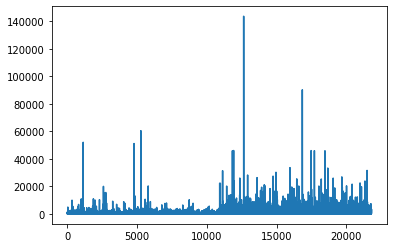

In [179]:
features['function_tokenized_ids_count'].plot()

<AxesSubplot:>

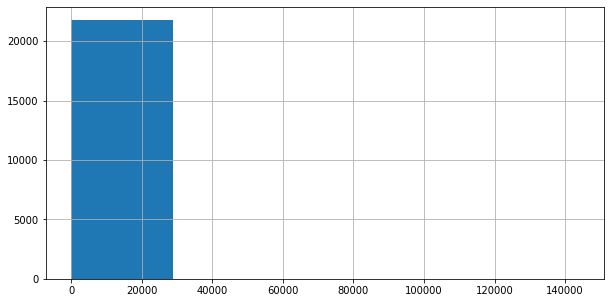

In [180]:
features['function_tokenized_ids_count'].hist(bins=5, figsize=(10, 5))

## Determine most frequent tokens

### Combine whole column to one big list

In [181]:
tl = features['function_tokenized_ids'].to_list()
tokens_list = [item for sublist in tl for item in sublist]
tokens_list

[47908,
 14794,
 48293,
 30504,
 38304,
 24686,
 8532,
 47661,
 46309,
 1640,
 534,
 44830,
 13360,
 1009,
 4897,
 6,
 35671,
 1009,
 13043,
 6,
 16183,
 1009,
 6031,
 6,
 50118,
 50117,
 50117,
 50117,
 50117,
 1437,
 1437,
 1437,
 6979,
 22523,
 6,
 6979,
 6958,
 6,
 7216,
 8110,
 11,
 9942,
 6,
 50118,
 50117,
 50117,
 50117,
 50117,
 1437,
 1437,
 1437,
 7216,
 8110,
 39491,
 20470,
 571,
 43,
 25522,
 50118,
 1437,
 39023,
 16224,
 1009,
 47438,
 131,
 50118,
 1437,
 39023,
 16224,
 1009,
 31549,
 131,
 50118,
 1437,
 6056,
 4712,
 1215,
 42130,
 1215,
 90,
 1009,
 20094,
 131,
 50118,
 1437,
 6056,
 4712,
 1215,
 43106,
 1215,
 90,
 1009,
 43106,
 131,
 50118,
 1437,
 6979,
 3023,
 6,
 1423,
 131,
 50118,
 1437,
 2960,
 36757,
 1009,
 34252,
 29116,
 131,
 50118,
 1437,
 272,
 4272,
 271,
 1009,
 642,
 3181,
 131,
 50118,
 1437,
 6056,
 4712,
 1215,
 9244,
 15072,
 1215,
 90,
 36173,
 131,
 50118,
 1437,
 6979,
 11,
 9942,
 1215,
 5881,
 131,
 50118,
 1437,
 6979,
 3236,
 1215,
 

### Find most frequent tokens

In [182]:
from collections import Counter
c = Counter(tokens_list)

most_frequent_tokens = c.most_common(size)


### Convert tuple list to token list

In [183]:
mft = [i[0] for i in most_frequent_tokens]
mft

[1437,
 1215,
 50118,
 50117,
 6,
 1640,
 131,
 46613,
 43,
 5457,
 36,
 4397,
 4,
 25522,
 24303,
 1594,
 321,
 1009,
 29,
 50140,
 642,
 90,
 10975,
 114,
 38304,
 45994,
 35,
 134,
 1178,
 3226,
 5214,
 288,
 359,
 20094,
 48404,
 118,
 176,
 45152,
 30921,
 438,
 282,
 22,
 35524,
 417,
 5,
 119,
 35122,
 23999,
 1297,
 49051,
 48955,
 49333,
 111,
 571,
 10799,
 338,
 705,
 428,
 112,
 506,
 8476,
 808,
 257,
 2544,
 306,
 510,
 23687,
 2055,
 48200,
 330,
 28696,
 742,
 11173,
 7,
 25384,
 48749,
 347,
 48209,
 671,
 43048,
 14181,
 49763,
 2881,
 597,
 939,
 104,
 1758,
 47006,
 3275,
 181,
 12,
 10339,
 48565,
 47908,
 7606,
 37457,
 398,
 1000,
 179,
 12528,
 298,
 500,
 49521,
 46469,
 6979,
 8532,
 1493,
 238,
 10431,
 42326,
 565,
 43880,
 45751,
 11127,
 16,
 1343,
 113,
 13650,
 45056,
 6031,
 128,
 387,
 448,
 48939,
 41006,
 207,
 579,
 7771,
 6460,
 8738,
 574,
 20836,
 11,
 462,
 13,
 10,
 16224,
 495,
 475,
 7087,
 246,
 947,
 219,
 48461,
 3463,
 620,
 2444,
 1397,


## Use first n tokens 

In [184]:
first_ones = features['function_tokenized_ids'].str[:size]
first_ones

0        [47908, 14794, 48293, 30504, 38304, 24686, 853...
1        [24336, 5282, 1215, 4917, 1215, 40412, 1640, 2...
2        [47908, 7038, 9834, 9966, 38304, 45089, 39781,...
3        [673, 46003, 2630, 48271, 3226, 20555, 48522, ...
4        [47908, 37280, 22130, 38304, 8738, 18801, 4011...
                               ...                        
21795    [47908, 7086, 49191, 38304, 28512, 500, 1397, ...
21796    [42653, 13842, 19149, 1215, 1588, 23032, 1215,...
21797    [29552, 1215, 90, 12907, 35605, 38304, 49144, ...
21798    [47908, 26742, 34603, 38304, 28512, 10926, 473...
21799    [330, 20815, 245, 1215, 571, 7485, 1215, 45705...
Name: function_tokenized_ids, Length: 21800, dtype: object

## Convert array columns to normal columns

In [185]:
column_names = ["token_" + str(i+1) for i in range(size)]
new_col = pd.DataFrame(first_ones.to_list(), columns=column_names).replace(np.nan, 0)
new_col

,token_1,token_2,token_3,token_4,token_5,token_6,token_7,token_8,token_9,token_10,...,token_1473,token_1474,token_1475,token_1476,token_1477,token_1478,token_1479,token_1480,token_1481,token_1482
0,47908,14794,48293,30504,38304,24686,8532.0,47661.0,46309.0,1640.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24336,5282,1215,4917,1215,40412,1640.0,24336.0,5282.0,1215.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,47908,7038,9834,9966,38304,45089,39781.0,10926.0,1640.0,30597.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,673,46003,2630,48271,3226,20555,48522.0,38304.0,32845.0,673.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,47908,37280,22130,38304,8738,18801,40118.0,1640.0,20836.0,30169.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21795,47908,7086,49191,38304,28512,500,1397.0,7160.0,1640.0,48440.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21796,42653,13842,19149,1215,1588,23032,1215.0,48790.0,1215.0,4917.0,...,112.0,131.0,50118.0,42666.0,1215.0,16435.0,19783.0,49789.0,50118.0,24303.0
21797,29552,1215,90,12907,35605,38304,49144.0,7061.0,38304.0,25153.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21798,47908,26742,34603,38304,28512,10926,47322.0,5067.0,49187.0,43048.0,...,3934.0,1000.0,108.0,347.0,29443.0,17024.0,844.0,250.0,1549.0,37399.0


## Join columns to feature df

In [186]:
features_tokens_added = features.join(new_col)
features_tokens_added

,processed_func,function_tokenized,function_tokenized_ids,lines,loc,function_tokenized_ids_count,token_1,token_2,token_3,token_4,...,token_1473,token_1474,token_1475,token_1476,token_1477,token_1478,token_1479,token_1480,token_1481,token_1482
0,void CairoOutputDev::drawImageMaskRegular(GfxS...,"[void, ĠCairo, Output, Dev, ::, draw, Image, M...","[47908, 14794, 48293, 30504, 38304, 24686, 853...",[void CairoOutputDev::drawImageMaskRegular(Gfx...,85,867,47908,14794,48293,30504,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,coolkey_add_object(coolkey_private_data_t *pri...,"[cool, key, _, add, _, object, (, cool, key, _...","[24336, 5282, 1215, 4917, 1215, 40412, 1640, 2...",[coolkey_add_object(coolkey_private_data_t *pr...,33,413,24336,5282,1215,4917,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,void CSoundFile::FineVolumeUp(ModChannel *pChn...,"[void, ĠCS, ound, File, ::, Fine, Volume, Up, ...","[47908, 7038, 9834, 9966, 38304, 45089, 39781,...",[void CSoundFile::FineVolumeUp(ModChannel *pCh...,20,285,47908,7038,9834,9966,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,OscillatorNode* AudioContext::createOscillator...,"[O, scill, ator, Node, *, ĠAudio, Context, ::,...","[673, 46003, 2630, 48271, 3226, 20555, 48522, ...",[OscillatorNode* AudioContext::createOscillato...,9,66,673,46003,2630,48271,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,void FrameView::setMediaType(const AtomicStrin...,"[void, ĠFrame, View, ::, set, Media, Type, (, ...","[47908, 37280, 22130, 38304, 8738, 18801, 4011...",[void FrameView::setMediaType(const AtomicStri...,6,64,47908,37280,22130,38304,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21795,void PageHandler::SetRenderer(RenderProcessHos...,"[void, ĠPage, Handler, ::, Set, R, end, erer, ...","[47908, 7086, 49191, 38304, 28512, 500, 1397, ...",[void PageHandler::SetRenderer(RenderProcessHo...,24,304,47908,7086,49191,38304,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21796,static void Process_ipfix_template_add(exporte...,"[static, Ġvoid, ĠProcess, _, ip, fix, _, templ...","[42653, 13842, 19149, 1215, 1588, 23032, 1215,...",[static void Process_ipfix_template_add(export...,182,2234,42653,13842,19149,1215,...,112.0,131.0,50118.0,42666.0,1215.0,16435.0,19783.0,49789.0,50118.0,24303.0
21797,status_t NuPlayer::GenericSource::initFromData...,"[status, _, t, ĠNu, Player, ::, Generic, Sourc...","[29552, 1215, 90, 12907, 35605, 38304, 49144, ...",[status_t NuPlayer::GenericSource::initFromDat...,142,1389,29552,1215,90,12907,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21798,void MigrationTest::SetUpVersion76Database() {...,"[void, ĠMigration, Test, ::, Set, Up, Version,...","[47908, 26742, 34603, 38304, 28512, 10926, 473...",[void MigrationTest::SetUpVersion76Database() ...,97,3388,47908,26742,34603,38304,...,3934.0,1000.0,108.0,347.0,29443.0,17024.0,844.0,250.0,1549.0,37399.0


## Prepare X and y

In [187]:
X = features_tokens_added.drop(['processed_func', 'function_tokenized', 'function_tokenized_ids', 'lines'], axis=1)
X
y = target
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
21795,1
21796,1
21797,1
21798,1


In [188]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Machine Learning

## Random Forest

In [190]:
# only random forest 
model = RandomForestClassifier()
model.fit(X_train, y_train.values.ravel())
y_pred = model.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.auc(fpr, tpr), 2)
cm = confusion_matrix(y_test, y_pred)

In [191]:
rc = metrics.recall_score(y_test, y_pred)
prc = metrics.precision_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

In [192]:
result_df = pd.DataFrame({'Accuracy': acc, 'AUC': auc, 'Recall': rc, 'Precision': prc, 'F1': f1}, index=[0])
result_df

,Accuracy,AUC,Recall,Precision,F1
0,0.681679,0.68,0.665737,0.686404,0.675913


In [193]:
from matplotlib import pyplot as plt
import seaborn as sns

Text(141.0, 0.5, 'Actual Values')

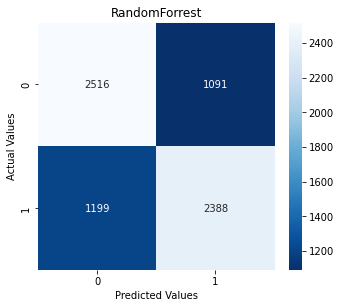

In [194]:
fig = plt.figure(figsize = (18,10))
sub = fig.add_subplot(2, 3, 1).set_title('RandomForrest')
cm_plot = sns.heatmap(cm, annot=True, cmap = 'Blues_r', fmt='g')
cm_plot.set_xlabel('Predicted Values')
cm_plot.set_ylabel('Actual Values')

## Fun with Embeddings

In [ ]:
df = pd.read_csv('../data/balanced_data.csv')
df['target'].value_counts()
df_target = df['target']

X_train, X_test, y_train, y_test = train_test_split(df['processed_func'], df['target'], test_size=0.33, random_state=42)

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)
model = tf.keras.Model(inputs=[text_input], outputs = [l])
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
 loss='binary_crossentropy',
 metrics=METRICS)
model.fit(X_train, y_train, epochs=2)

In [ ]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

In [ ]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

In [ ]:
acc = metrics.accuracy_score(y_test, y_predicted)
acc

In [ ]:
rc = metrics.recall_score(y_test, y_predicted)
prc = metrics.precision_score(y_test, y_predicted)
f1 = metrics.f1_score(y_test, y_predicted)

In [ ]:
result_df = pd.DataFrame({'Accuracy': acc, 'AUC': auc, 'Recall': rc, 'Precision': prc, 'F1': f1}, index=[0])
result_df

In [ ]:
cm = confusion_matrix(y_test, y_predicted)
fig = plt.figure(figsize = (18,10))
sub = fig.add_subplot(2, 3, 1).set_title('Embeddings')
cm_plot = sns.heatmap(cm, annot=True, cmap = 'Blues_r', fmt='g')
cm_plot.set_xlabel('Predicted Values')
cm_plot.set_ylabel('Actual Values')

## Other Tests

### Test multiple classifiers

In [ ]:
model_pipeline = []
model_pipeline.append(LogisticRegression(solver='liblinear'))
model_pipeline.append(SVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())
model_pipeline.append(GaussianNB())

In [ ]:
model_list = ['LR', 'SVM', 'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes']

acc_list = []
auc_list = []
cm_list = []

for model in model_pipeline:
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_test)
    acc_list.append(metrics.accuracy_score(y_test, y_pred))
    fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
    auc_list.append(round(metrics.auc(fpr, tpr), 2))
    cm_list.append(confusion_matrix(y_test, y_pred))

In [ ]:
result_df = pd.DataFrame({'Model': model_list, 'Accuracy': acc_list, 'AUC': auc_list})
result_df

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
fig = plt.figure(figsize = (18,10))
for i,cm in enumerate(cm_list):
    model = model_list[i];
    sub = fig.add_subplot(2, 3, i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True, cmap = 'Blues_r', fmt='g')
    cm_plot.set_xlabel('Predicted Values')
    cm_plot.set_ylabel('Actual Values')

In [ ]:
result_df = pd.DataFrame({'Model': model_list, 'Accuracy': acc_list, 'AUC': auc_list})
result_df

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
fig = plt.figure(figsize = (18,10))
for i,cm in enumerate(cm_list):
    model = model_list[i];
    sub = fig.add_subplot(2, 3, i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True, cmap = 'Blues_r', fmt='g')
    cm_plot.set_xlabel('Predicted Values')
    cm_plot.set_ylabel('Actual Values')

In [43]:
result_df = pd.DataFrame({'Model': model_list, 'Accuracy': acc_list, 'AUC': auc_list})
result_df

,Model,Accuracy,AUC
0,LR,0.628857,0.63
1,SVM,0.634557,0.63
2,KNN,0.595496,0.60
3,Decision Tree,0.622602,0.62
4,Random Forest,0.726300,0.73
5,Naive Bayes,0.587990,0.59


In [44]:
from matplotlib import pyplot as plt
import seaborn as sns

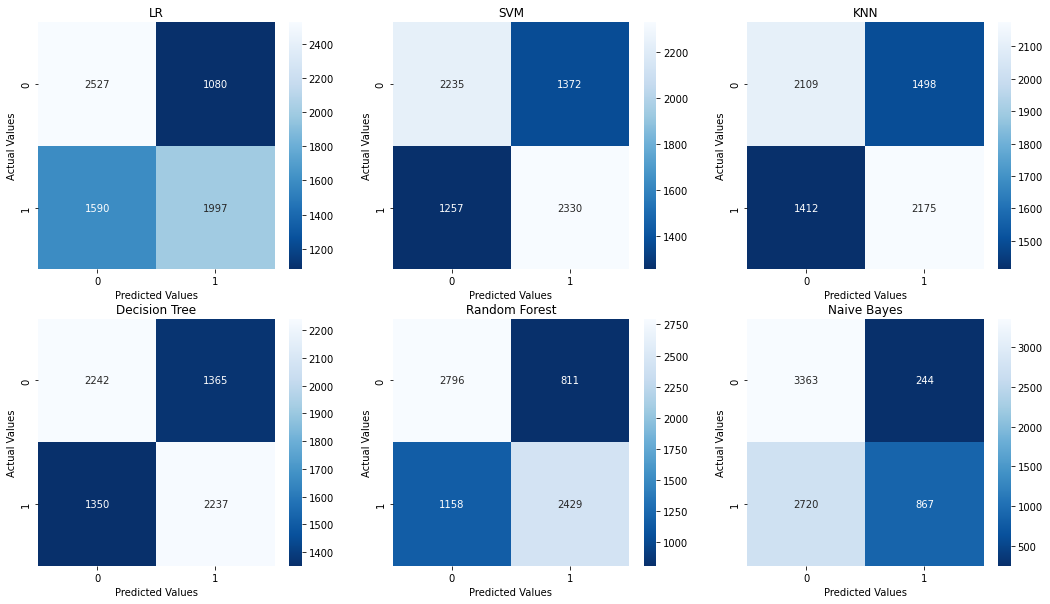

In [45]:
fig = plt.figure(figsize = (18,10))
for i,cm in enumerate(cm_list):
    model = model_list[i];
    sub = fig.add_subplot(2, 3, i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True, cmap = 'Blues_r', fmt='g')
    cm_plot.set_xlabel('Predicted Values')
    cm_plot.set_ylabel('Actual Values')